In [1]:
#import logging
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 350)
pd.set_option('display.min_rows', 135)
pd.set_option('display.max_columns', None)

In [2]:
# Initialize logging
#logging.basicConfig(level=logging.DEBUG)  # Change the level to control verbosity

# Set the structure for relative paths

In [3]:
relativePath_EF = "..\Data_Sets\originalData\EconomicFreedom_Heritage_1995-2023.csv"
relativePath_devInd = "..\Data_Sets\originalData\WorldDevelopmentIndicators_1960-2022.csv"

df_EF = pd.read_csv(relativePath_EF) #Economic Freedom Data Set from Heritage
df_WB = pd.read_csv(relativePath_devInd) #Some Development Indicators from World Bank

# Fixing Country Names

In [4]:
#fixing column names to match each other
df_EF.rename(columns={"Name": "Country Name"}, inplace=True)
df_WB.rename(columns={"Time": "Index Year"}, inplace=True)

#------------------ Cleaning extra-space in the end of strings, and making country names consistent
#(PS: ISO Code and Country Code uses different standards)

#removing extra spaces
df_EF["Country Name"] = df_EF["Country Name"].str.strip()

#Renaming Countries from df_EF to df_WB standard
df_EF.loc[df_EF["Country Name"] == "Côte d'Ivoire", "Country Name"] = "Cote d'Ivoire"
df_EF.loc[df_EF["Country Name"] == "São Tomé and Príncipe", "Country Name"] = "Sao Tome and Principe"
df_EF.loc[df_EF["Country Name"] == "The Philippines", "Country Name"] = "Philippines"
df_EF.loc[df_EF["Country Name"] == "Burma", "Country Name"] = "Myanmar"
df_EF.loc[df_EF["Country Name"] == "Cabo Verde", "Country Name"] = "Cape Verde"

#Fixing double standard naming in df_EF
df_EF.loc[df_EF["Country Name"] == "Macedonia", "Country Name"] = "North Macedonia"
df_EF.loc[df_EF["Country Name"] == "Slovakia", "Country Name"] = "Slovak Republic"
df_EF.loc[df_EF["Country Name"] == "Swaziland", "Country Name"] = "Eswatini"
df_EF.loc[df_EF["Country Name"] == "The Netherlands", "Country Name"] = "Netherlands"

#Renaming Countries from df_WB to df_EF standard
df_WB.loc[df_WB["Country Name"] == "Czechia", "Country Name"] = "Czech Republic"
df_WB.loc[df_WB["Country Name"] == "Cabo Verde", "Country Name"] = "Cape Verde"
df_WB.loc[df_WB["Country Name"] == "Congo, Dem. Rep.", "Country Name"] = "Democratic Republic of Congo"
df_WB.loc[df_WB["Country Name"] == "Congo, Rep.", "Country Name"] = "Republic of Congo"
df_WB.loc[df_WB["Country Name"] == "Egypt, Arab Rep.", "Country Name"] = "Egypt"
df_WB.loc[df_WB["Country Name"] == "Hong Kong SAR, China", "Country Name"] = "Hong Kong"
df_WB.loc[df_WB["Country Name"] == "Iran, Islamic Rep.", "Country Name"] = "Iran"
df_WB.loc[df_WB["Country Name"] == "Lao PDR", "Country Name"] = "Laos"
df_WB.loc[df_WB["Country Name"] == "Macao SAR, China", "Country Name"] = "Macau"
df_WB.loc[df_WB["Country Name"] == "Micronesia, Fed. Sts.", "Country Name"] = "Micronesia"
df_WB.loc[df_WB["Country Name"] == "Korea, Dem. People's Rep.", "Country Name"] = "North Korea"
df_WB.loc[df_WB["Country Name"] == "Korea, Rep.", "Country Name"] = "South Korea"
df_WB.loc[df_WB["Country Name"] == "Russian Federation", "Country Name"] = "Russia"
df_WB.loc[df_WB["Country Name"] == "St. Lucia", "Country Name"] = "Saint Lucia"
df_WB.loc[df_WB["Country Name"] == "St. Vincent and the Grenadines", "Country Name"] = "Saint Vincent and the Grenadines"
df_WB.loc[df_WB["Country Name"] == "Syrian Arab Republic", "Country Name"] = "Syria"
df_WB.loc[df_WB["Country Name"] == "Bahamas, The", "Country Name"] = "The Bahamas"
df_WB.loc[df_WB["Country Name"] == "Gambia, The", "Country Name"] = "The Gambia"
df_WB.loc[df_WB["Country Name"] == "Turkiye", "Country Name"] = "Turkey"
df_WB.loc[df_WB["Country Name"] == "Venezuela, RB", "Country Name"] = "Venezuela"
df_WB.loc[df_WB["Country Name"] == "Yemen, Rep.", "Country Name"] = "Yemen"

In [5]:
# --------------- Removing some unnecessary rows and columns
EF_dropCases = ["Short Name","ISO Code", "Id"]
df_EF = df_EF.drop(EF_dropCases,axis=1) #axis 1 drops along the column axis

WB_dropCases = ["Country Code","Time Code"]
df_WB = df_WB.drop(WB_dropCases,axis=1) #axis 1 drops along the column axis

#drops those pesky lines at the end of df_WB
df_WB = df_WB.drop(df_WB.tail(4).index) 

#------------------ Removing Countries from df_WB that don't appear on df_EF

df_eligibleCountries = df_EF["Country Name"].unique()
filtered_df_WB = df_WB[df_WB['Country Name'].isin(df_eligibleCountries)]

#print("df_EF", df_EF["Country Name"].nunique())
#print("df_WB", df_WB['Country Name'].nunique())
#print("filtered_df_WB", filtered_df_WB["Country Name"].nunique())

missing_countries = df_EF[~df_EF["Country Name"].isin(filtered_df_WB["Country Name"])] # the ~ is a negation operator
print("missing_countries", missing_countries['Country Name'].unique())
#For now, I'll let Taiwan be missing.


df_master = pd.merge(filtered_df_WB, df_EF, on=["Country Name", "Index Year"], how="left")

missing_countries ['Taiwan']


# Organizing and Sorting Columns

In [6]:
#Re-ordering and sorting some columns

#Renaming some columns
df_master = df_master.rename(columns={
    'GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD]': 'GDP per capita (const 2015USD)',
    'GDP per capita (current US$) [NY.GDP.PCAP.CD]': 'GDP per capita (current USD)',
    'GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]': 'GDP per capita growth',
    'GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]': 'GDP PPP per capita (const 2017USD)',
    'Gini index [SI.POV.GINI]': 'Gini',
    'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]': 'Inflation CPI',
    'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate) [SL.TLF.ACTI.ZS]': 'Labor force size',
    'Land area (sq. km) [AG.LND.TOTL.K2]': 'Land area (sq. km)',
    'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]': 'Life expectancy at birth',
    'Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]': 'Under-5 mortality rate (per 1k live births)',
    'Population living in slums (% of urban population) [EN.POP.SLUM.UR.ZS]': 'Population living in slums (as % of urban)',
    'Population, total [SP.POP.TOTL]': 'Total population',
    'Poverty gap at $2.15 a day (2017 PPP) (%) [SI.POV.GAPS]': 'Poverty gap at $2.15 a day (% of population)',
    'Poverty gap at $6.85 a day (2017 PPP) (%) [SI.POV.UMIC.GP]': 'Poverty gap at $6.85 a day (% of population)',
    'Real interest rate (%) [FR.INR.RINR]': 'Real interest rate',
    'Trade (% of GDP) [NE.TRD.GNFS.ZS]': 'Trade (% of GDP)',
    'Trade in services (% of GDP) [BG.GSR.NFSV.GD.ZS]': 'Trade in services (% of GDP)'
})

# Define the desired column order
columnList = [
    'Country Name',
    'Index Year',
    'Overall Score',
    'Property Rights',
    'Government Integrity',
    'Judicial Effectiveness',
    'Government Spending',
    'Tax Burden',
    'Fiscal Health',
    'Business Freedom',
    'Monetary Freedom',
    'Labor Freedom',
    'Financial Freedom',
    'Investment Freedom',
    'Trade Freedom',
    'GDP per capita (const 2015USD)',
    'GDP per capita (current USD)',
    'GDP per capita growth',
    'GDP PPP per capita (const 2017USD)',
    'Total population',
    'Land area (sq. km)',
    'Gini',
    'Inflation CPI',
    'Real interest rate',
    'Labor force size',
    'Trade (% of GDP)',
    'Trade in services (% of GDP)',
    'Poverty gap at $2.15 a day (% of population)',
    'Poverty gap at $6.85 a day (% of population)',
    'Population living in slums (as % of urban)',
    'Life expectancy at birth',
    'Under-5 mortality rate (per 1k live births)']

#Creating the Master Data Frame, and purging older DFs/variables from memory 
df_master = pd.DataFrame(df_master, columns=columnList)

del missing_countries, filtered_df_WB, \
    df_eligibleCountries, df_EF, df_WB

#---------------- sorting the DataFrame
df_master = df_master.sort_values(by=["Country Name", "Index Year"], ascending=[True, True])

#resetting indexing
df_master = df_master.reset_index(drop=True)

# Filling and Converting Data

In [7]:
# Replace problematic values with NaN
df_master.replace(['', '..'], np.nan, inplace=True)

#Fixing some Data Types
toFloatColumns = df_master.iloc[:,2:].columns #selecting all columns, except Country Name and Index Year
df_master[toFloatColumns] = df_master[toFloatColumns].astype(float)

df_master['Index Year'] = df_master['Index Year'].astype(int)
#df_master['Total population'] = df_master['Total population'].astype(int)
df_master['Total population'] = pd.to_numeric(df_master['Total population'], errors='coerce')


#rounding numbers up to the 4th decimal place, so it's easier to read
df_master[toFloatColumns] = df_master[toFloatColumns].round(4)

_Note: This approach for interpolation is kind of slow. But since our dataset isn't that big, it's not a problem._

**I don't advise it on really large datasets though**

In [8]:
def interpolateMiddle(df, n_times=0, field='Country Name', columns = [], extrapolate = 4, timeField = 'Index Year'):
    '''
    Essentially, just fill the middle values for any given DF, and project past/future for n times.
    
    df: df (self explanatory)
    n_times: interpolation reach. If zero, find maximum value based on 'field'.
    field: which column we'll use to define what is "middle data".
    columns: which columns we'd like to interpolate. If empty, interpolate all columns.
    extrapolate: how much time to project past "middle data"
    timeField: column name for the DataFrame's period
    
    '''
    # If there are no selected cols, run function over all columns.
    if len(columns) < 1:
        columns = list(df.columns)
    
    # If zero, find maximum value based on 'field'.
    if n_times <= 0:
        # lazy way to make it iterate, at most, over all years from 1960 to 2022)
        # This makes it less generalizable to other DFs though
        n_times = int((2022-1960)/2)
    
    # Create masks to exclude endpoints in data
    earliest_time = df.loc[df[field].notna(), timeField].min()
    latest_time = df.loc[df[field].notna(), timeField].max()
    
    # If there's no non-NaN value, return the DataFrame as-is
    if pd.isna(earliest_time) or pd.isna(latest_time):
        return df
    
    # Defining what's "middle data"
    maskedtimes = (df[timeField] >= earliest_time)&(df[timeField] <= latest_time)
    
    # Only interpolate the middle
    temp_df = df.loc[maskedtimes, columns]
    temp_df.interpolate(method='linear', limit=n_times, limit_direction='both', inplace=True)    
    
    # Update the original DataFrame (on middle step)
    df.loc[maskedtimes, columns] = temp_df
    
    if extrapolate > 0:
        temp_df = df.loc[: , columns]
        temp_df.interpolate(method='linear', limit=extrapolate, limit_direction='both', inplace=True)    
    
        # Update the original DataFrame (on extrapolate step)
        df.loc[: , columns] = temp_df
    
    return df

In [9]:
to_interpolate = list(df_master.columns)
socioEconList = to_interpolate[15:]
econFreedomList = to_interpolate[2:15]

from functools import partial


#the reason we're separating it into two lists is that
#we don't want to extrapolate EF values too much, since they're crucial for our data
for i in econFreedomList:
    print(i)
    partial_interpolate = partial(interpolateMiddle, n_times=0, extrapolate=1, columns=[str(i)], field = str(i))
    df_master = df_master.groupby(by=['Country Name']).apply(partial_interpolate).reset_index(drop=True)
    
for i in socioEconList:
    print(i)
    partial_interpolate = partial(interpolateMiddle, n_times=0, extrapolate=4, columns=[str(i)], field = str(i))
    df_master = df_master.groupby(by=['Country Name']).apply(partial_interpolate).reset_index(drop=True)


Overall Score
Property Rights
Government Integrity
Judicial Effectiveness
Government Spending
Tax Burden
Fiscal Health
Business Freedom
Monetary Freedom
Labor Freedom
Financial Freedom
Investment Freedom
Trade Freedom
GDP per capita (const 2015USD)
GDP per capita (current USD)
GDP per capita growth
GDP PPP per capita (const 2017USD)
Total population
Land area (sq. km)
Gini
Inflation CPI
Real interest rate
Labor force size
Trade (% of GDP)
Trade in services (% of GDP)
Poverty gap at $2.15 a day (% of population)
Poverty gap at $6.85 a day (% of population)
Population living in slums (as % of urban)
Life expectancy at birth
Under-5 mortality rate (per 1k live births)


functools' partial helps to set parameters for interpolateMiddle.

We'll interpolate each column separately, so that we can control exactly how much we'll extrapolate.

These are one of the most problematic countries, in terms of Gini data.

I can't go too far with interpolation, because some countries would simply be a straight line in some features.

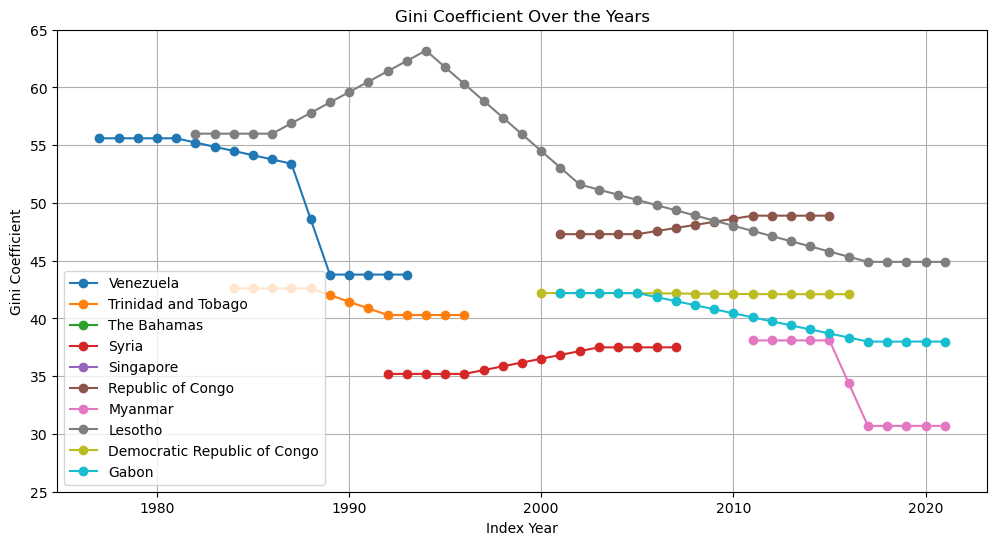

In [10]:
# List of countries to plot
countries_to_plot = ['Venezuela', 'Trinidad and Tobago', 'The Bahamas', 'Syria', 'Singapore', 'Republic of Congo', 'Myanmar', 'Lesotho', 'Democratic Republic of Congo', 'Gabon']

plt.figure(figsize=(12, 6))

# Loop through each country and plot
for country in countries_to_plot:
    df_filtered = df_master[df_master['Country Name'] == country][['Index Year', 'Gini']]
    df_filtered = df_filtered.sort_values(by='Index Year')
    plt.plot(df_filtered['Index Year'], df_filtered['Gini'], marker='o', label=country)

plt.title('Gini Coefficient Over the Years')
plt.xlabel('Index Year')
plt.ylabel('Gini Coefficient')
plt.ylim(25, 65)  # Limit y-axis from 20 to 55
plt.legend()
plt.grid(True)
plt.show()


In [11]:
#Fixing some Data Types

df_master['Index Year'] = df_master['Index Year'].astype(int)
df_master['Total population'] = pd.to_numeric(df_master['Total population'], errors='coerce')

toFloatColumns = df_master.iloc[:,2:].columns #selecting all columns, except Country Name and Index Year
df_master[toFloatColumns] = df_master[toFloatColumns].astype(float)

#rounding numbers up to the 4th decimal place, so it's easier to read
df_master[toFloatColumns] = df_master[toFloatColumns].round(4)

# Binning Countries into Quintiles

In [12]:
group_names = ['Q1','Q2','Q3','Q4','Q5']

# Function to apply for each year
def calculate_quintiles(df_year):
    if len(df_year) > 0 and df_year['GDP per capita (current USD)'].notna().any():  
        df_year['Country Quintile'] = pd.qcut(df_year['GDP per capita (current USD)'].dropna(), 
                                              q=5, 
                                              labels=group_names, 
                                              duplicates='drop')
    return df_year

# Group by 'Index Year' and apply the function
df_master = df_master.groupby('Index Year', as_index=False).apply(calculate_quintiles)
df_master.reset_index(drop=True, inplace=True)

df_master.to_csv('..\Data_Sets\processed\economicData_1960-2022_noNaN-drops.csv', index = False)

In [13]:
# Cleaning EconFreedom Parameters
df_master.dropna(thresh=8,
                 axis=0,
                 inplace = True,
                 subset =[
                 'Overall Score',
                 'Property Rights',
                 'Government Integrity',
                 'Judicial Effectiveness',
                 'Government Spending',
                 'Tax Burden',
                 'Fiscal Health',
                 'Business Freedom',
                 'Monetary Freedom',
                 'Labor Freedom',
                 'Financial Freedom',
                 'Investment Freedom',
                 'Trade Freedom'])

In [14]:
df_master.to_csv('..\Data_Sets\processed\economicData_1960-2022.csv', index = False)

econFreedom = df_master[(df_master['Index Year'] <= 2022) & (df_master['Index Year'] >= 1995)]
econFreedom.to_csv('..\Data_Sets\processed\economicData_1995-2022.csv', index = False)